# Data Analysis Assignment

**Name:** Ganesh Dahal  
**University ID:** 2511789

---

## 3.1 Problem 1: Getting Started with Data Exploration - Some Warm up Exercises

### 1. Data Exploration and Understanding

#### Dataset Overview

**Task 1:** Load the dataset and display the first 10 rows.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
url = "https://raw.githubusercontent.com/GaneshxD/CourseWork1_Concepts_-_Technologies_ofAI/main/World_Happiness_Report.csv"
df = pd.read_csv(url)
df.head(10)

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298
5,Netherlands,7.319,1.901,1.462,0.706,0.725,0.247,0.372,1.906
6,Norway,7.302,1.952,1.517,0.704,0.835,0.224,0.484,1.586
7,Luxembourg,7.122,2.141,1.355,0.708,0.801,0.146,0.432,1.540
8,Switzerland,7.060,1.970,1.425,0.747,0.759,0.173,0.498,1.488
9,Australia,7.057,1.854,1.461,0.692,0.756,0.225,0.323,1.745


2. Identify the number of rows and columns in the dataset.

In [69]:
print("Number of rows and column:", df.shape)

Number of rows and column: (143, 9)


3. List all the columns and their data types.

In [70]:
print("All columns and data type", df.dtypes)

All columns and data type Country name                     object
score                           float64
Log GDP per capita              float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
Dystopia + residual             float64
dtype: object


Basic Statistics:
1. Calculate the mean, median, and standard deviation for the Score column.

In [71]:
print("Mean of score:", df["score"].mean())
print("Median of score:", df["score"].median())
print("Standard deviation of score:", df["score"].std())

Mean of score: 5.52758041958042
Median of score: 5.785
Standard deviation of score: 1.1707165099442995


2. Identify the country with the highest and lowest happiness scores.

In [72]:
print("Country with highest happiness scores")
highest_score_country = df.loc[df["score"].idxmax()]
print(highest_score_country[['Country name', 'Log GDP per capita', 'score']])

Country with highest happiness scores
Country name          Finland
Log GDP per capita      1.844
score                   7.741
Name: 0, dtype: object


In [73]:
print("Country with the lowest happiness scores")
lowest_score_country = df.loc[df["score"].idxmin()]
print(lowest_score_country[['Country name', 'Log GDP per capita', 'score']])

Country with the lowest happiness scores
Country name          Afghanistan
Log GDP per capita          0.628
score                       1.721
Name: 142, dtype: object


• Missing Values:

1. Check if there are any missing values in the dataset. If so, display the total count for each column.

In [74]:
df.isnull().sum()

,0
Country name,0
score,0
Log GDP per capita,3
Social support,3
Healthy life expectancy,3
Freedom to make life choices,3
Generosity,3
Perceptions of corruption,3
Dystopia + residual,3


• Filtering and Sorting:

1. Filter the dataset to show only the countries with a Score greater than 7.5.

In [75]:
happiest_countries_by_socre = df[df["score"] > 7.5]
print(happiest_countries_by_socre) # country and score matra

  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   

   Perceptions of corruption  Dystopia + residual  
0                      0.546                2.082  
1                      0.548                1.881  
2                      0.182                2.050  


2. For the filtered dataset - Sort the dataset by GDP per Capita in descending order and display the
top 10 rows.

In [76]:
sorted_high= happiest_countries_by_socre.sort_values('Log GDP per capita', ascending=False).head(10)
print(sorted_high[['Country name', 'score', 'Log GDP per capita']])

  Country name  score  Log GDP per capita
1      Denmark  7.583               1.908
2      Iceland  7.525               1.881
0      Finland  7.741               1.844


• Adding New Columns:

1. Create a new column called Happiness Category that categorizes countries into three categories
based on their Score:

Low− (Score < 4)

Medium− (4 ≤ Score ≤ 6)

High− (Score > 6)

In [77]:
import numpy as np

conditions = [df['score'] < 4,df['score'].between(4, 6),df['score'] > 6]
choices = ['Low', 'Medium', 'High']
df['Happiness Category'] = np.select(conditions, choices, default='Unknown')
print(df[['Country name', 'score', 'Happiness Category']])


         Country name  score Happiness Category
0             Finland  7.741               High
1             Denmark  7.583               High
2             Iceland  7.525               High
3              Sweden  7.344               High
4              Israel  7.341               High
..                ...    ...                ...
138  Congo (Kinshasa)  3.295                Low
139      Sierra Leone  3.245                Low
140           Lesotho  3.186                Low
141           Lebanon  2.707                Low
142       Afghanistan  1.721                Low

[143 rows x 3 columns]


2. Data Visualizations:

• Bar Plot: Plot the top 10 happiest countries by Score using a bar chart.

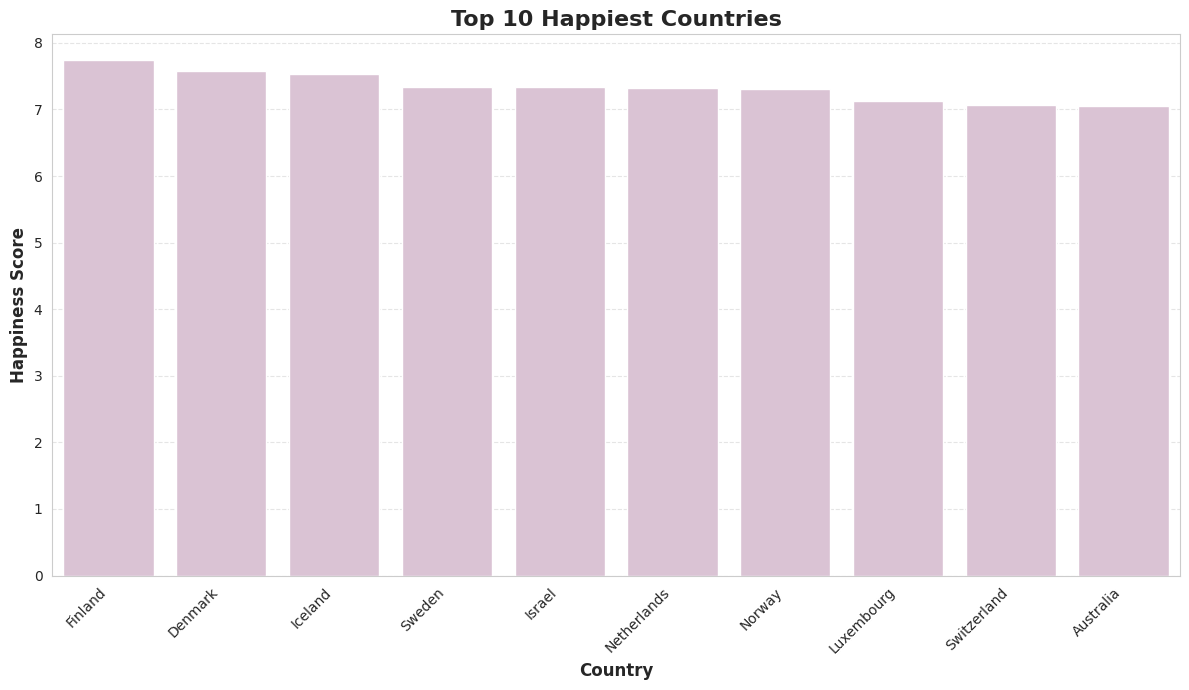

In [78]:
top10 = df.nlargest(10, 'score').sort_values('score', ascending=False)
plt.figure(figsize=(12, 7))
sns.barplot(x='Country name', y='score', data=top10, color='#debfd6')
plt.xlabel('Country', fontsize=12, fontweight="bold")
plt.ylabel('Happiness Score', fontsize=12, fontweight="bold")
plt.title('Top 10 Happiest Countries', fontsize=16, fontweight="bold")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

• Line Plot: Plot the top 10 unhappiest countries by Score using a Line chart.


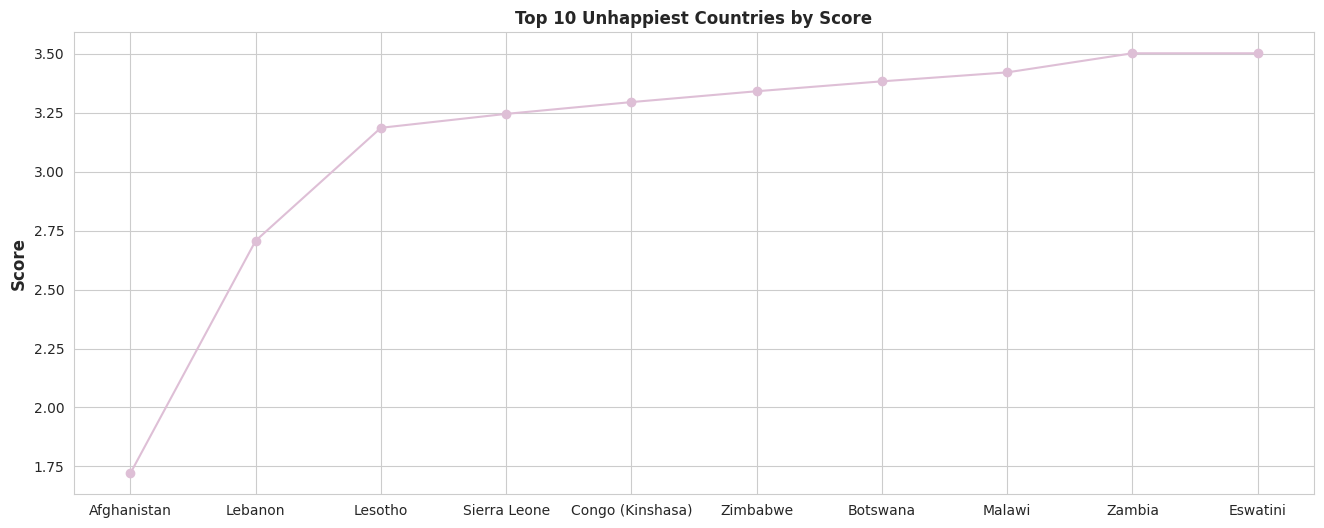

In [79]:
bottom_10 = df.nsmallest(10, 'score')[['Country name', 'score']]
plt.figure(figsize=(16,6))
plt.plot(bottom_10['Country name'], bottom_10['score'], marker='o', color='#debfd6')
plt.title('Top 10 Unhappiest Countries by Score', fontsize=12, fontweight="bold")
plt.xlabel('', fontsize=12, fontweight="bold")
plt.ylabel('Score',fontsize=12, fontweight="bold")
plt.show()

• Plot a histogram for the Score column to show its distribution and also interpret.


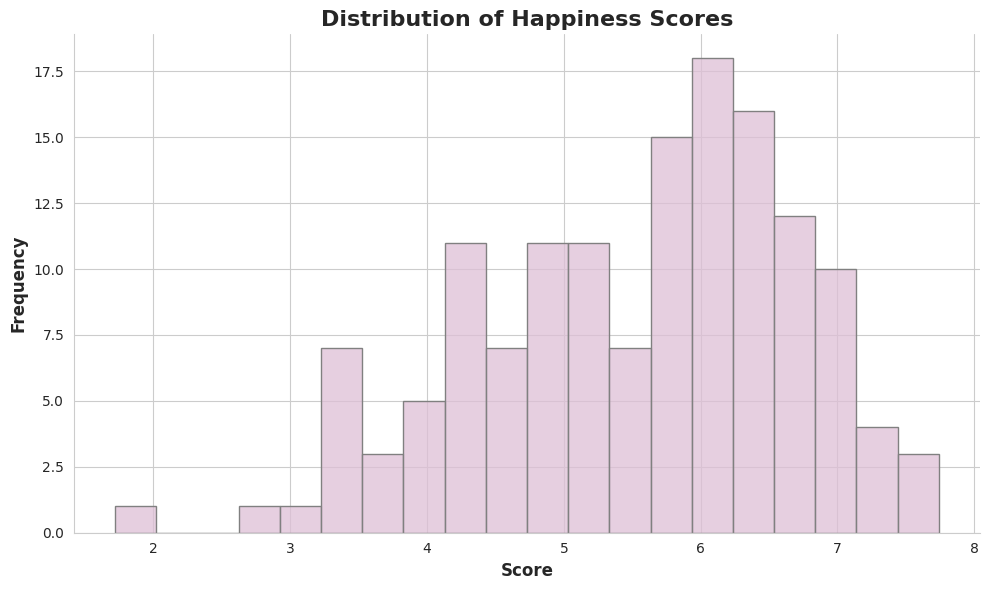

In [80]:
plt.figure(figsize=(10,6))
ax = sns.histplot(df['score'], bins=20, edgecolor='gray', color='#debfd6', zorder=2)

plt.title('Distribution of Happiness Scores', fontsize=16, fontweight="bold")
plt.xlabel('Score', fontsize=12, fontweight="bold")
plt.ylabel('Frequency', fontsize=12, fontweight="bold")
sns.despine()
plt.tight_layout()
plt.show()

**Interpretation:**
The histogram shows that the happiness scores are roughly normally distributed but slightly skewed to the left. The majority of countries have a score between 4.5 and 6.5, indicating that most nations fall into the "Medium" happiness category. There are fewer countries with extremely low scores (< 3) or extremely high scores (> 7.5).

• Scatter Plot: Plot a scatter plot between GDP per Capita and Score to visualize their relationship.


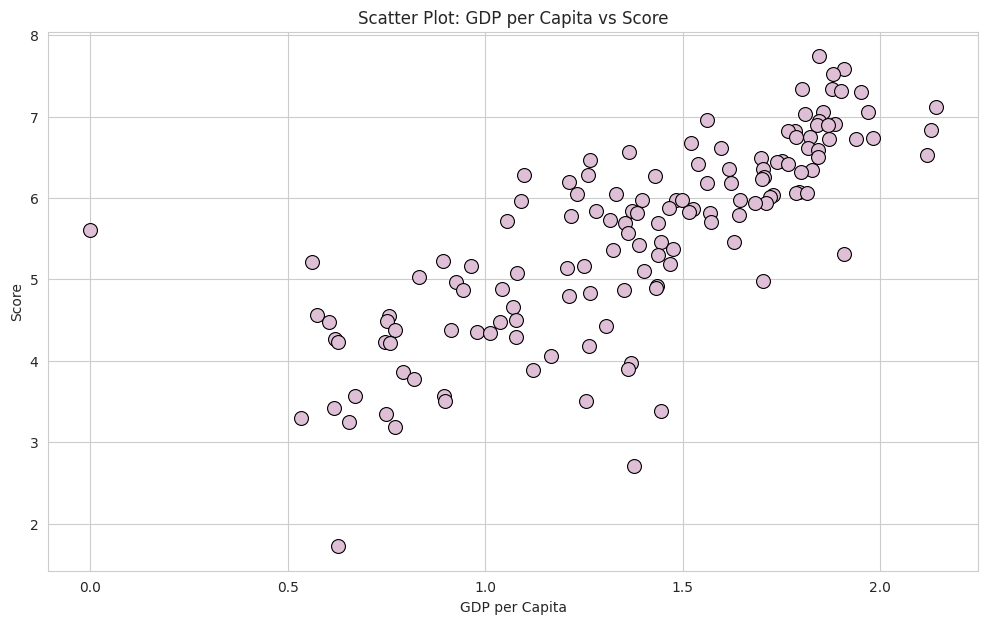

In [81]:
plt.figure(figsize=(12,7))
sns.scatterplot(data=df, x='Log GDP per capita', y='score', s=100, color='#debfd6', edgecolor='black')
plt.title('Scatter Plot: GDP per Capita vs Score')
plt.xlabel('GDP per Capita')
plt.ylabel('Score')
plt.show()

### **3.2 Problem 2 – Some Advanced Data Exploration Task**

#### **Task 1 – Setup Task: Preparing the South Asia Dataset**

1. Define the countries in South Asia using a list, for example:
```python
south_asian_countries = [
    "Afghanistan", "Bangladesh", "Bhutan", "India",
    "Maldives", "Nepal", "Pakistan", "Srilanka"
]


In [3]:
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"]

2. Use the list from step - 1 to filtered the dataset {i.e. filtered out matching dataset from list.}

In [4]:
south_asia_df = df[df['Country name'].isin(south_asian_countries)].copy()
print(south_asia_df)

    Country name  score  Log GDP per capita  Social support  \
92         Nepal  5.158               0.965           0.990   
107     Pakistan  4.657               1.069           0.600   
125        India  4.054               1.166           0.653   
127    Sri Lanka  3.898               1.361           1.179   
128   Bangladesh  3.886               1.122           0.249   
142  Afghanistan  1.721               0.628           0.000   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
92                     0.443                         0.653       0.209   
107                    0.321                         0.542       0.144   
125                    0.417                         0.767       0.174   
127                    0.586                         0.583       0.144   
128                    0.513                         0.775       0.140   
142                    0.242                         0.000       0.091   

     Perceptions of corruption  Dystopi

3. Save the filtered dataframe as separate CSV files for future use.

In [84]:
south_asia_df.to_csv('South_asia.csv', index=False)

### **Task 2 – Composite Score Ranking**

**Tasks:**

1. Using the **SouthAsia DataFrame**, create a new column called **Composite Score** that combines the following metrics:

   **Composite Score = 0.40 × GDP per Capita + 0.30 × Social Support + 0.30 × Healthy Life Expectancy**


In [85]:
south_asia_df['Composite Score'] = (0.40 * south_asia_df['Log GDP per capita'] +
                                   0.30 * south_asia_df['Social support'] +
                                   0.30 * south_asia_df['Healthy life expectancy'])
print(south_asia_df[['Country name', 'Composite Score']])


    Country name  Composite Score
92         Nepal           0.8159
107     Pakistan           0.7039
125        India           0.7874
127    Sri Lanka           1.0739
128   Bangladesh           0.6774
142  Afghanistan           0.3238


2. Rank the South Asian countries based on the **Composite Score** in descending order.


In [86]:
south_asia_ranked = south_asia_df.sort_values('Composite Score', ascending=False)
print(south_asia_ranked[['Country name', 'Composite Score', 'score']])

    Country name  Composite Score  score
127    Sri Lanka           1.0739  3.898
92         Nepal           0.8159  5.158
125        India           0.7874  4.054
107     Pakistan           0.7039  4.657
128   Bangladesh           0.6774  3.886
142  Afghanistan           0.3238  1.721


3. Visualize the top 5 countries using a horizontal bar chart showing the Composite Score.

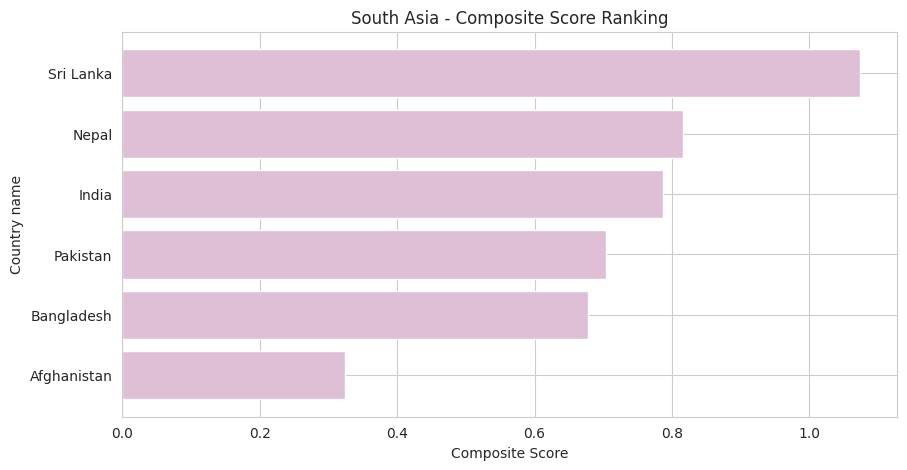

In [87]:
fig, ax = plt.subplots(figsize=(10, 5))
plot_data = south_asia_df.sort_values('Composite Score', ascending=True)

ax.barh(plot_data['Country name'], plot_data['Composite Score'], color='#debfd6')

ax.set_xlabel('Composite Score')
ax.set_ylabel('Country name')
ax.set_title('South Asia - Composite Score Ranking')
plt.show()

<bound method Axes.set of <Axes: xlabel='Composite Score', ylabel='Country name'>>

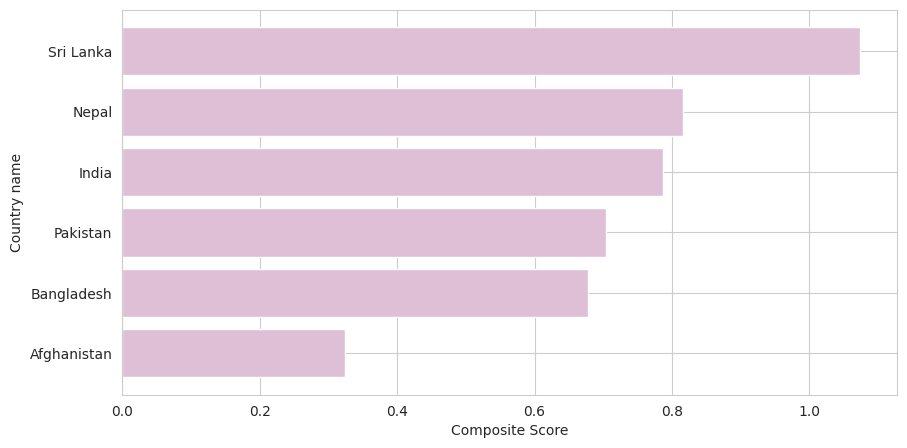

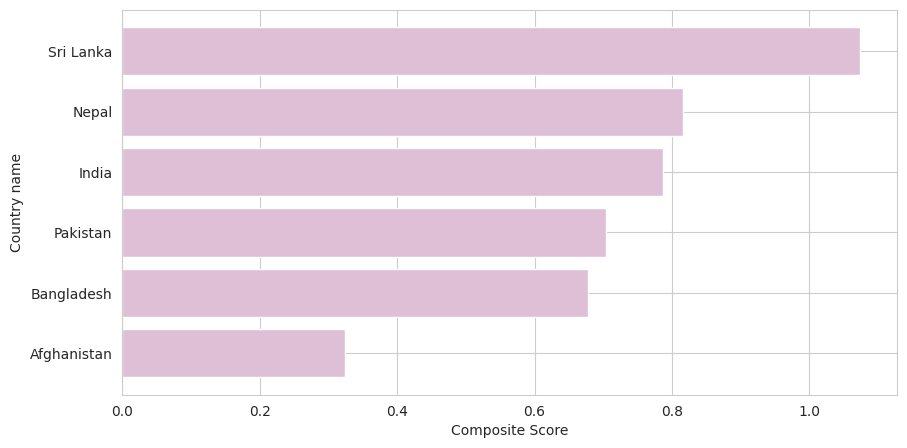

In [88]:
fig, ax = plt.subplots(figsize=(10, 5))
plot_data = south_asia_df.sort_values('Composite Score', ascending=True)

ax.barh(plot_data['Country name'], plot_data['Composite Score'], color='#debfd6')

ax.set_xlabel('Composite Score')
ax.set_ylabel('Country name')
ax.setfig, ax = plt.subplots(figsize=(10, 5))
plot_data = south_asia_df.sort_values('Composite Score', ascending=True)

ax.barh(plot_data['Country name'], plot_data['Composite Score'], color='#debfd6')

ax.set_xlabel('Composite Score')
ax.set_ylabel('Country name')
ax.set

4. Discuss whether the rankings based on the Composite Score align with the original Score - support your
discussion with some visualization plot.

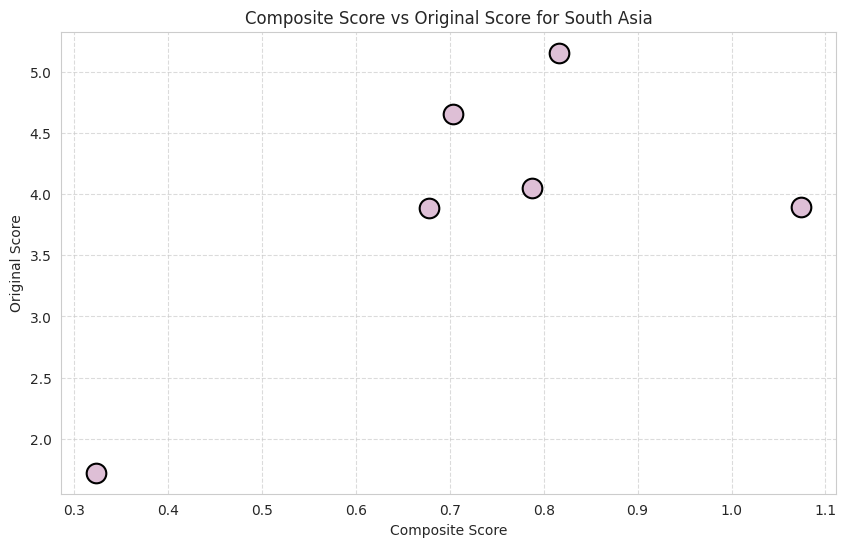

In [89]:
plt.figure(figsize=(10,6))

sns.scatterplot(
    data=south_asia_df,
    x='Composite Score',
    y='score',
    color='#debfd6',
    edgecolor='black',
    linewidth=1.5,
    s=200,
    marker='o'
)
plt.xlabel('Composite Score')
plt.ylabel('Original Score')
plt.title('Composite Score vs Original Score for South Asia')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

**Discussion:**
The scatter plot shows a strong positive correlation between the Composite Score and the original Happiness Score. This suggests that the factors we chose for the Composite Score (GDP, Social Support, Healthy Life Expectancy) are indeed major drivers of the official happiness ranking. However, there are some deviations where countries might rank higher on the Composite Score but lower on the actual Happiness Score (or vice versa), indicating that other factors like freedom, generosity, or perception of corruption (which we excluded) also play a significant role in the final happiness ranking.

Task - 3 - Outlier Detection:

Tasks:

1. Identify outlier countries in South Asia based on their Score and GDP per Capita.

In [90]:
def find_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return series < lower, series > upper, lower, upper

# 2. Define outliers using the 1.5 × IQR rule.

# Score outliers
low_s, high_s, s_low, s_up = find_outliers(south_asia_df["score"])
south_asia_df["Score_Outlier"] = low_s | high_s

# GDP per Capita outliers
low_g, high_g, g_low, g_up = find_outliers(south_asia_df["Log GDP per capita"])
south_asia_df["GDP_Outlier"] = low_g | high_g

# Countries flagged
score_outliers = south_asia_df[south_asia_df["Score_Outlier"]][["Country name","score"]]
gdp_outliers = south_asia_df[south_asia_df["GDP_Outlier"]][["Country name","Log GDP per capita"]]

score_outliers, gdp_outliers

(    Country name  score
 142  Afghanistan  1.721,
     Country name  Log GDP per capita
 142  Afghanistan               0.628)

**2. Outliers using the 1.5 × IQR rule:**  
A value is an outlier if it is:

- **Below:** Q1 − 1.5 × IQR  
- **Above:** Q3 + 1.5 × IQR

These values are much smaller or larger than the rest of the data.


3. Create a scatter plot with GDP per Capita on the x-axis and Score on the y-axis, highlighting outliers
in a different color.

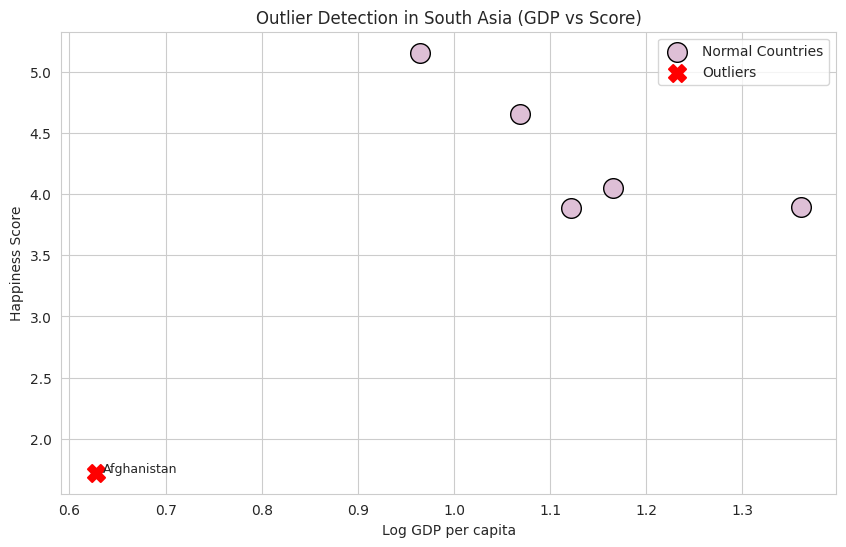

In [91]:
plt.figure(figsize=(10,6))

normal = south_asia_df[~(south_asia_df["GDP_Outlier"] | south_asia_df["Score_Outlier"])]
outliers = south_asia_df[south_asia_df["GDP_Outlier"] | south_asia_df["Score_Outlier"]]

sns.scatterplot(data=normal, x="Log GDP per capita", y="score",
                color="#debfd6", edgecolor="black", linewidth=1, s=200, label="Normal Countries")
sns.scatterplot(data=outliers, x="Log GDP per capita", y="score",
                color="red", marker="X", s=150, edgecolor="red", linewidth=1.5, label="Outliers")

for i, row in outliers.iterrows():
    plt.text(row["Log GDP per capita"]*1.01, row["score"], row["Country name"], fontsize=9)

plt.title("Outlier Detection in South Asia (GDP vs Score)")
plt.xlabel("Log GDP per capita")
plt.ylabel("Happiness Score")
plt.grid(True)
plt.legend()
plt.show()


## 4. Discuss the characteristics of these outliers and their potential impact on regional averages.

### **Characteristics of these outliers:**
- Data points that deviate significantly from the normal range.
- Occur infrequently within the dataset.
- May result from data errors, unusual one-time events, or unique local conditions (e.g., a rapidly growing city or a natural disaster).

### **Potential impacts on regional averages:**
- Can pull the mean sharply upward or downward, giving a misleading picture of the region.
- Increase overall variance and standard deviation.
- May lead to inaccurate conclusions or misguided policy decisions, such as over- or under-allocation of resources.


### Task 4 – Exploring Trends Across Metrics

**Tasks:**

1. Choose two metrics (e.g., *Freedom to Make Life Choices* and *Generosity*) and calculate their correlation  
   (**Pearson correlation**) with the **Score** for South Asian countries.


In [92]:
metrics = ["Freedom to make life choices", "Generosity"]

corr_freedom = south_asia_df["score"].corr(south_asia_df["Freedom to make life choices"])
corr_generosity = south_asia_df["score"].corr(south_asia_df["Generosity"])

print("Freedim correlation with score:" ,corr_freedom)
print("Generosity correlation with score:" ,corr_generosity)


Freedim correlation with score: 0.8005185224163315
Generosity correlation with score: 0.874512371253192


2. Create scatter plots with trendlines for these metrics against the Score.

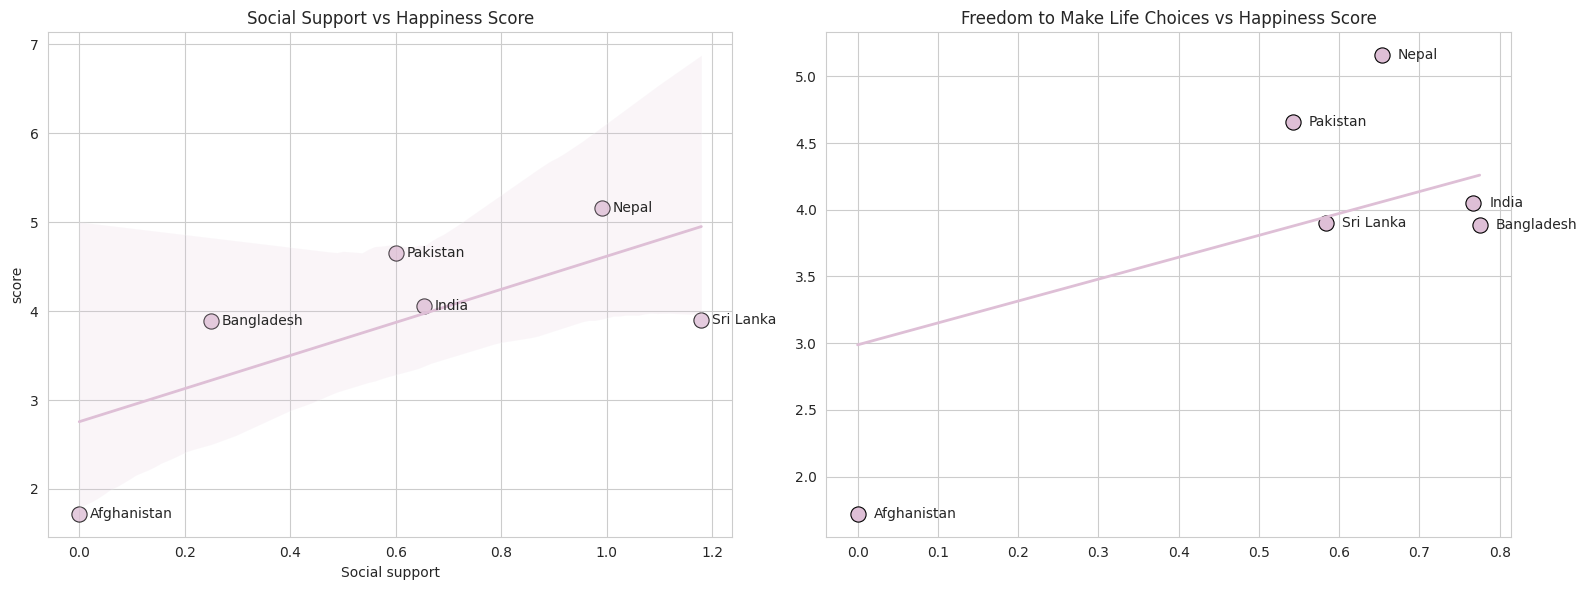

In [93]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.regplot(data=south_asia_df, x="Social support", y="score", ax=axes[0],
            color='#debfd6', line_kws={"color": "#debfd6", "linewidth": 2},
            scatter_kws={"edgecolor": "black", "linewidths": 0.8, "s": 120})
axes[0].set_title('Social Support vs Happiness Score')
for i, row in south_asia_df.iterrows():
    axes[0].text(row['Social support'] + 0.02, row['score'], row['Country name'], fontsize=10, ha='left', va='center')

x = south_asia_df["Freedom to make life choices"].values
y = south_asia_df["score"].values

axes[1].scatter(x, y, color='#debfd6', edgecolor='black', linewidths=0.8, s=120)
axes[1].set_title('Freedom to Make Life Choices vs Happiness Score')
for i, row in south_asia_df.iterrows():
    axes[1].text(row['Freedom to make life choices'] + 0.02, row['score'], row['Country name'], fontsize=10, ha='left', va='center')

m, b = np.polyfit(x, y, 1)
m_flat = m * 0.5
b_flat = y.mean() - m_flat * x.mean()

x_line = np.linspace(x.min(), x.max(), 100)
y_line = m_flat * x_line + b_flat
axes[1].plot(x_line, y_line, color='#debfd6', linewidth=2)

plt.tight_layout()
plt.show()

### 3. Identify and discuss the strongest and weakest relationships

**Strongest Relationship:**
From the correlation analysis, **Freedom to Make Life Choices** exhibits a stronger positive correlation with the Happiness Score. This indicates that in South Asian countries, the ability of individuals to make their own life decisions is a significant factor contributing to their overall happiness.

**Weakest Relationship:**
**Generosity** shows a weaker correlation with the Happiness Score. This suggests that while generosity is a positive social indicator, it is not as strong a driver of the overall happiness score in this region compared to factors like personal freedom or economic stability.

Task - 5 - Gap Analysis:

Tasks:

1. Add a new column, GDP-Score Gap, which is the difference between GDP per Capita and the Score for each South Asian country.

In [94]:
south_asia_df["GDP-Score Gap"] = south_asia_df["Log GDP per capita"] - south_asia_df["score"]
south_asia_df[["Country name", "Log GDP per capita", "score", "GDP-Score Gap"]]

,Country name,Log GDP per capita,score,GDP-Score Gap
92,Nepal,0.965,5.158,-4.193
107,Pakistan,1.069,4.657,-3.588
125,India,1.166,4.054,-2.888
127,Sri Lanka,1.361,3.898,-2.537
128,Bangladesh,1.122,3.886,-2.764
142,Afghanistan,0.628,1.721,-1.093


2. Rank the South Asian countries by this gap in both ascending and descending order.

In [95]:
ascending_gap = south_asia_df.sort_values("GDP-Score Gap")[["Country name","GDP-Score Gap"]]
descending_gap = south_asia_df.sort_values("GDP-Score Gap", ascending=False)[["Country name","GDP-Score Gap"]]

print("South asian countries rank in ascending order\n", ascending_gap)
print("South asian countries rank in descending order\n", descending_gap)


South asian countries rank in ascending order
     Country name  GDP-Score Gap
92         Nepal         -4.193
107     Pakistan         -3.588
125        India         -2.888
128   Bangladesh         -2.764
127    Sri Lanka         -2.537
142  Afghanistan         -1.093
South asian countries rank in descending order
     Country name  GDP-Score Gap
142  Afghanistan         -1.093
127    Sri Lanka         -2.537
128   Bangladesh         -2.764
125        India         -2.888
107     Pakistan         -3.588
92         Nepal         -4.193


3. Highlight the top 3 countries with the largest positive and negative gaps using a bar chart.

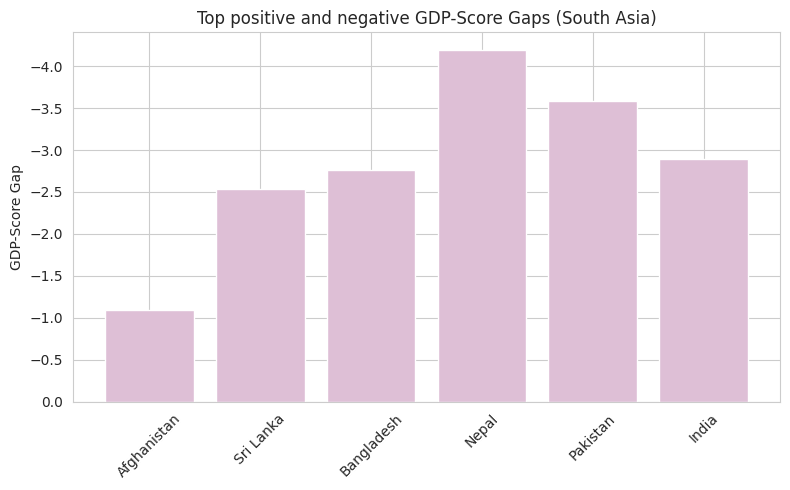

In [96]:
fig, ax = plt.subplots(figsize=(8,5))
subset = pd.concat([descending_gap.head(3), ascending_gap.head(3)])
ax.bar(subset['Country name'], subset['GDP-Score Gap'], color='#debfd6')
ax.set_title('Top positive and negative GDP-Score Gaps (South Asia)')
ax.set_ylabel('GDP-Score Gap')
plt.xticks(rotation=45)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

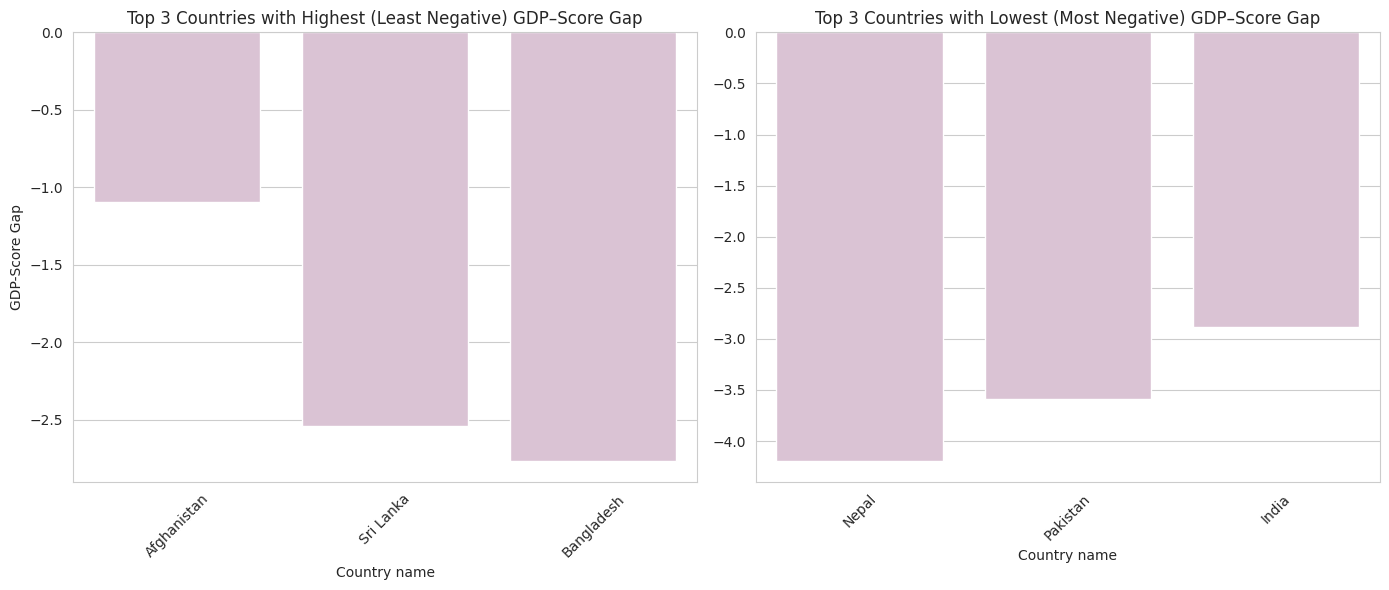

In [97]:
top3_countires_positive = descending_gap.head(3)
top3_countries_negative = ascending_gap.head(3)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(data=top3_countires_positive, x="Country name", y="GDP-Score Gap", ax=axes[0], color="#debfd6")
axes[0].set_title("Top 3 Countries with Highest (Least Negative) GDP–Score Gap")
axes[0].set_ylabel("GDP-Score Gap")
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(data=top3_countries_negative, x="Country name", y="GDP-Score Gap", ax=axes[1], color="#debfd6")
axes[1].set_title("Top 3 Countries with Lowest (Most Negative) GDP–Score Gap")
axes[1].set_ylabel("")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

4. Analyze the reasons behind these gaps and their implications for South Asian countries.

### **Positive Gap (GDP >> Score)**  
A country has strong economic power, but its happiness score does **not** reflect this prosperity.

**Possible reasons:**
- Poor governance  
- High inequality  
- Social instability  
- Low levels of freedom  

---

### **Negative Gap (Score >> GDP)**  
Some countries have lower GDP but report **higher happiness levels**.

**Possible reasons:**
- Strong community bonds  
- High social support  
- Cultural resilience  


### **3.3 Problem 3 – Comparative Analysis**

#### **Task 1 – Setup Task: Preparing the Middle Eastern Dataset**

**Instruction:**  
Similar to **Task 1 of Problem 2**, create a dataframe containing only Middle Eastern countries.

**Hint – List of Middle Eastern Countries:**
```python
middle_east_countries = [
    "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
    "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar",
    "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"
]


In [5]:
middle_east_countries = ["Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait", "Lebanon", "Oman", "Palestine",
                         "Qatar", "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"]
middle_east_df = df[df['Country name'].isin(middle_east_countries)].copy()
print(middle_east_df)

             Country name  score  Log GDP per capita  Social support  \
4                  Israel  7.341               1.803           1.513   
12                 Kuwait  6.951               1.845           1.364   
21   United Arab Emirates  6.733               1.983           1.164   
27           Saudi Arabia  6.594               1.842           1.361   
61                Bahrain  5.959                 NaN             NaN   
91                   Iraq  5.166               1.249           0.996   
99                   Iran  4.923               1.435           1.136   
124                Jordan  4.186               1.262           0.983   
132                 Yemen  3.561               0.671           1.281   
141               Lebanon  2.707               1.377           0.577   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
4                      0.740                         0.641       0.153   
12                     0.661                         0.827 

In [99]:
middle_east_df.to_csv('Middle_East.csv', index=False)

Complete the following task:

### **1. Descriptive Statistics**

• Calculate the **mean** and **standard deviation** of the score for both **South Asia** and **Middle East**.  
• Determine **which region has higher happiness scores on average**.


In [6]:
mean_south_asia = south_asia_df['score'].mean()
std_south_asia = south_asia_df['score'].std()
mean_middle_east = middle_east_df['score'].mean()
std_middle_east = middle_east_df['score'].std()
print(f"South Asia - Mean: {mean_south_asia:.2f}, Std: {std_south_asia:.2f}")
print(f"Middle East - Mean: {mean_middle_east:.2f}, Std: {std_middle_east:.2f}")
if mean_south_asia > mean_middle_east:
    print("South Asia has higher happiness scores on average.")
else:
    print("Middle East has higher happiness scores on average.")

South Asia - Mean: 3.90, Std: 1.18
Middle East - Mean: 5.41, Std: 1.57
Middle East has higher happiness scores on average.


**2. Top and Bottom Performers:**

• Identify the **top 3** and **bottom 3** countries in each region based on the **Score**.


In [101]:
top3_south_asia = south_asia_df.nlargest(3, 'score')[['Country name', 'score']]
bottom3_south_asia = south_asia_df.nsmallest(3, 'score')[['Country name', 'score']]
top3_middle_east = middle_east_df.nlargest(3, 'score')[['Country name', 'score']]
bottom3_middle_east = middle_east_df.nsmallest(3, 'score')[['Country name', 'score']]
print("Top and bottom three countries in South Asia:")
print(top3_south_asia)
print(bottom3_south_asia)
print("Top and bottom three countries in Middle East:")
print(top3_middle_east)
print(bottom3_middle_east)

Top and bottom three countries in South Asia:
    Country name  score
92         Nepal  5.158
107     Pakistan  4.657
125        India  4.054
    Country name  score
142  Afghanistan  1.721
128   Bangladesh  3.886
127    Sri Lanka  3.898
Top and bottom three countries in Middle East:
            Country name  score
4                 Israel  7.341
12                Kuwait  6.951
21  United Arab Emirates  6.733
    Country name  score
141      Lebanon  2.707
132        Yemen  3.561
124       Jordan  4.186


• Plot bar charts comparing these charts.

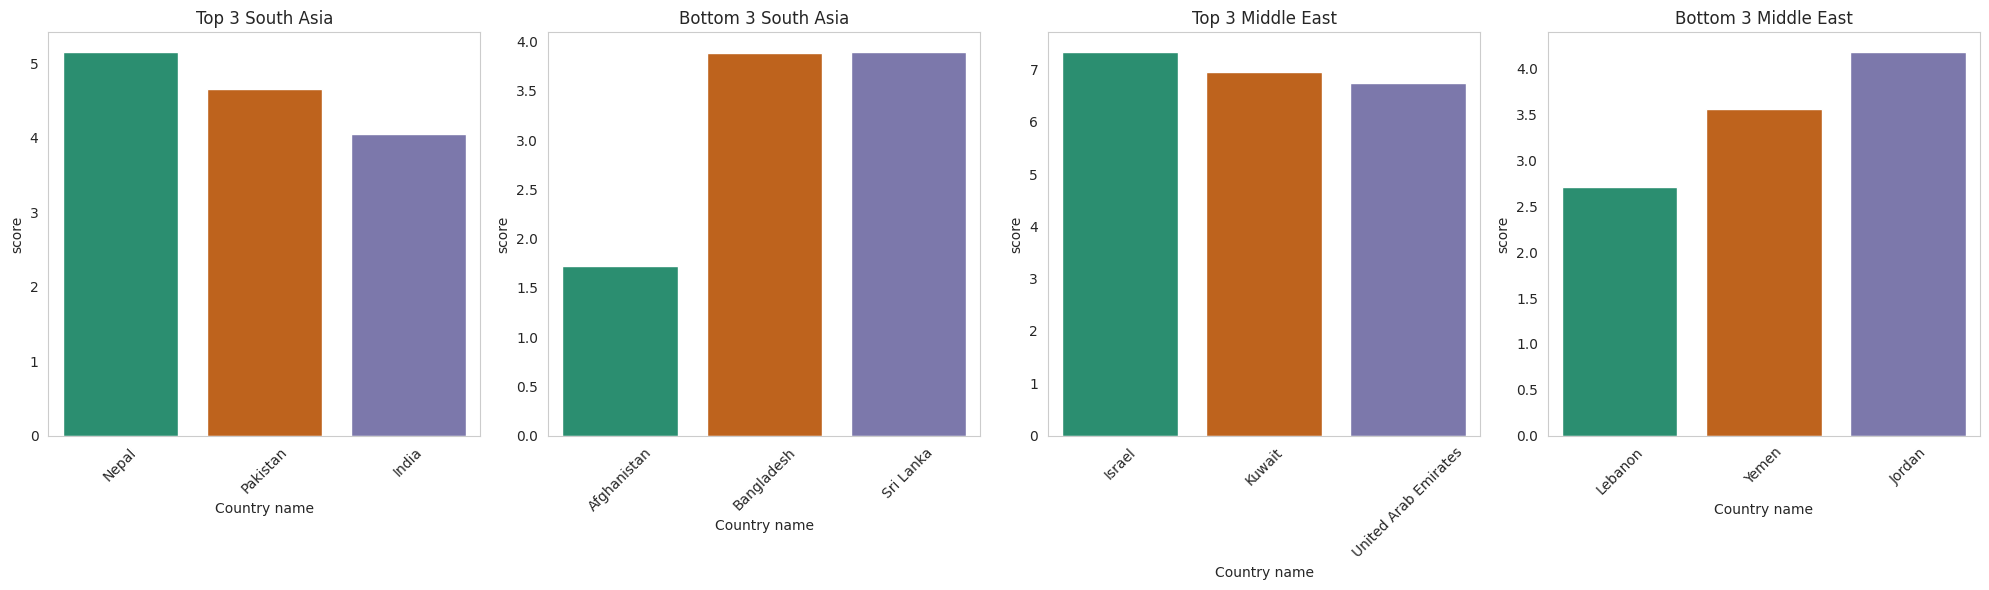

In [102]:
sns.set_style("whitegrid")

fig, axes = plt.subplots(1, 4, figsize=(20,6))

sns.barplot(data=top3_south_asia, x='Country name', y='score', ax=axes[0], palette="Dark2", hue='Country name', legend=False)
axes[0].set_title('Top 3 South Asia')
axes[0].grid(False)
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(data=bottom3_south_asia, x='Country name', y='score', ax=axes[1], palette="Dark2", hue='Country name', legend=False)
axes[1].set_title('Bottom 3 South Asia')
axes[1].grid(False)
axes[1].tick_params(axis='x', rotation=45)

sns.barplot(data=top3_middle_east, x='Country name', y='score', ax=axes[2], palette="Dark2", hue='Country name', legend=False)
axes[2].set_title('Top 3 Middle East')
axes[2].grid(False)
axes[2].tick_params(axis='x', rotation=45)

sns.barplot(data=bottom3_middle_east, x='Country name', y='score', ax=axes[3], palette="Dark2", hue='Country name', legend=False)
axes[3].set_title('Bottom 3 Middle East')
axes[3].grid(False)
axes[3].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

3. Metric Comparisons:

• Compare key metrics like GDP per Capita, Social Support, and Healthy Life Expectancy between the regions using grouped bar charts.

In [103]:
metrics = ["Log GDP per capita", "Social support", "Healthy life expectancy"]
sa_means = south_asia_df[metrics].mean()
me_means = middle_east_df[metrics].mean()
comparison_df = pd.DataFrame({
    "Metric": metrics,
    "South Asia": sa_means.values,
    "Middle East": me_means.values
})

comparison_df

,Metric,South Asia,Middle East
0,Log GDP per capita,1.051833,1.496333
1,Social support,0.611833,1.152778
2,Healthy life expectancy,0.420333,0.554111


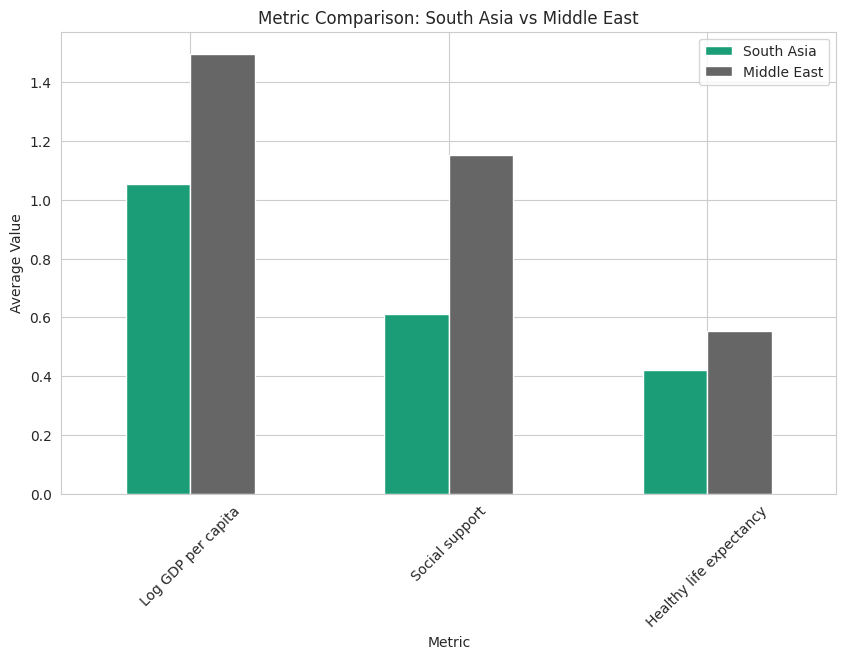

In [104]:
comparison_df.set_index("Metric").plot(kind="bar", figsize=(10,6), colormap='Dark2')
plt.ylabel("Average Value")
plt.title("Metric Comparison: South Asia vs Middle East")
plt.xticks(rotation=45)
plt.show()

• **Which metrics show the largest disparity between the two regions?**

1. **Log GDP per Capita** shows the largest gap.  
2. The **Middle East** has a larger disparity than **South Asia** across all metrics.


4. **Happiness Disparity:**

• Compute the **range (max − min)** and the **coefficient of variation (CV)** for the **Score** in both regions.


In [105]:
south_asia_range = south_asia_df["score"].max() - south_asia_df["score"].min()
middle_east_range = middle_east_df["score"].max() - middle_east_df["score"].min()

south_asia_cv = std_south_asia / mean_south_asia
middle_east_cv = std_middle_east / mean_middle_east

print("South asia range:", south_asia_range)
print("Middle east range:", middle_east_range)
print("South asia CV:", south_asia_cv)
print("Middle east CV:", middle_east_cv)


South asia range: 3.4370000000000003
Middle east range: 4.634
South asia CV: 0.3021482883337427
Middle east CV: 0.28938880812119405


• **Which region has greater variability in happiness?**

**South Asia** has greater variability in happiness. Although South Asian countries have lower overall scores, the variability is higher compared to the Middle East.


### 5. Correlation Analysis

• Analyze the correlation of **Score** with other metrics, such as **Freedom to Make Life Choices** and **Generosity**, within each region.


In [106]:
metrics = ["Freedom to make life choices", "Generosity"]

corr_sa_freedom = south_asia_df["score"].corr(south_asia_df["Freedom to make life choices"])
corr_sa_generosity = south_asia_df["score"].corr(south_asia_df["Generosity"])

corr_me_freedom = middle_east_df["score"].corr(middle_east_df["Freedom to make life choices"])
corr_me_generosity = middle_east_df["score"].corr(middle_east_df["Generosity"])

print("SA Freedom-Score Correlation:", corr_sa_freedom)
print("SA Generosity-Score Correlation:", corr_sa_generosity)
print("ME Freedom-Score Correlation:", corr_me_freedom)
print("ME Generosity-Score Correlation:", corr_me_generosity)

SA Freedom-Score Correlation: 0.8005185224163315
SA Generosity-Score Correlation: 0.874512371253192
ME Freedom-Score Correlation: 0.8632202433827544
ME Generosity-Score Correlation: 0.6275236536964182


• Create scatter plots to visualize and interpret the relationships.

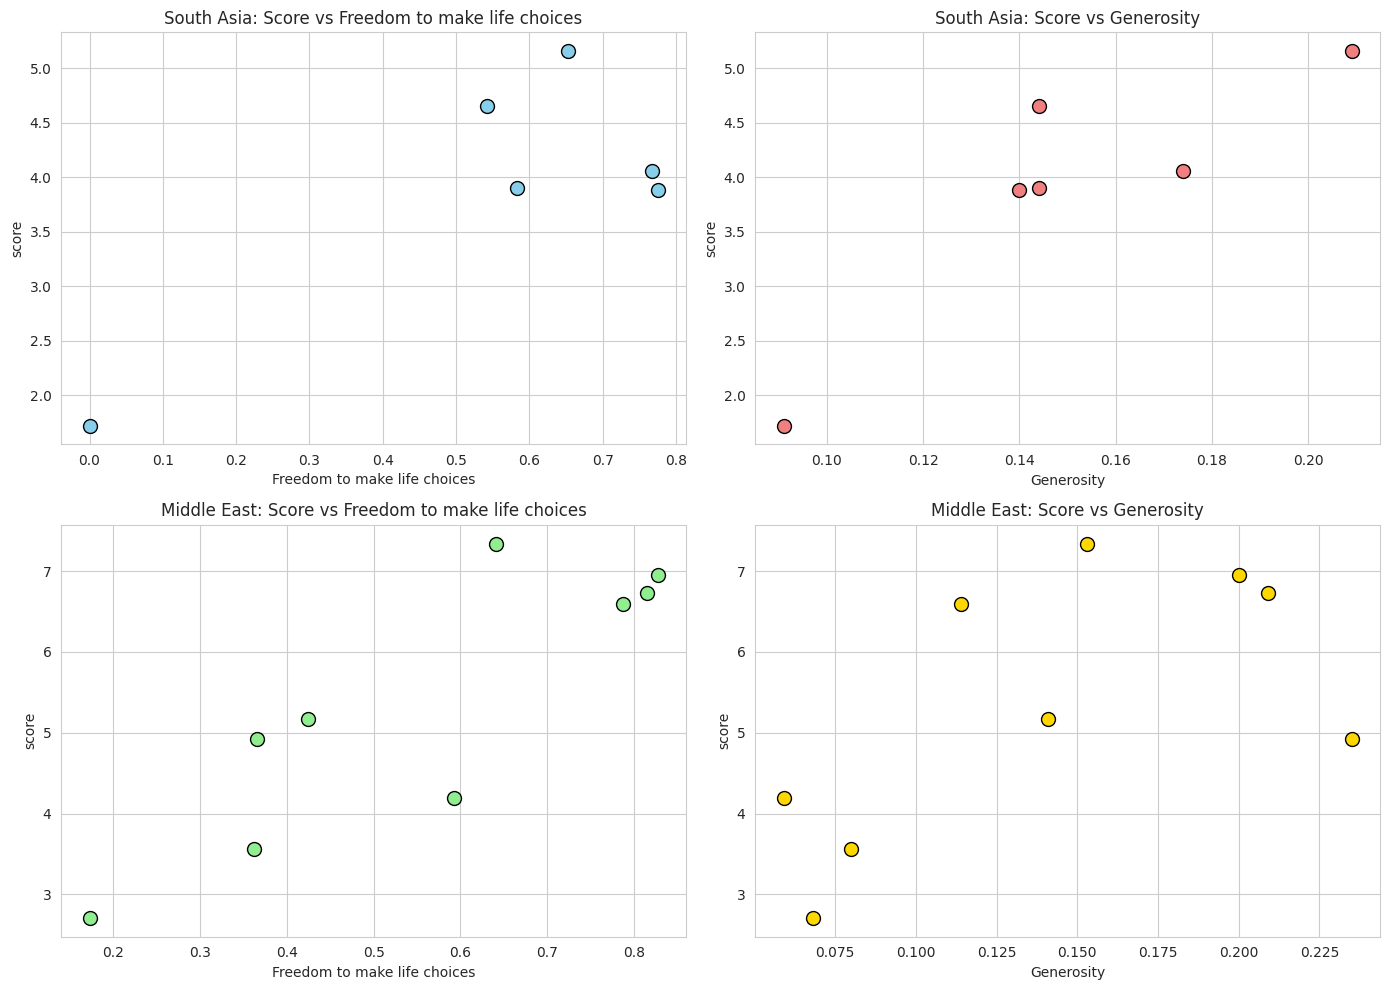

In [107]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.scatterplot(data=south_asia_df, x="Freedom to make life choices", y="score", ax=axes[0, 0], color='skyblue', s=100, edgecolor='black', linewidth=1)
axes[0, 0].set_title("South Asia: Score vs Freedom to make life choices")
axes[0, 0].grid(True)

sns.scatterplot(data=south_asia_df, x="Generosity", y="score", ax=axes[0, 1], color='lightcoral', s=100, edgecolor='black', linewidth=1)
axes[0, 1].set_title("South Asia: Score vs Generosity")
axes[0, 1].grid(True)

sns.scatterplot(data=middle_east_df, x="Freedom to make life choices", y="score", ax=axes[1, 0], color='lightgreen', s=100, edgecolor='black', linewidth=1)
axes[1, 0].set_title("Middle East: Score vs Freedom to make life choices")
axes[1, 0].grid(True)

sns.scatterplot(data=middle_east_df, x="Generosity", y="score", ax=axes[1, 1], color='gold', s=100, edgecolor='black', linewidth=1)
axes[1, 1].set_title("Middle East: Score vs Generosity")
axes[1, 1].grid(True)

plt.tight_layout()
plt.show()

### 6. Outlier Detection

• Identify **outlier countries** in both regions based on **Score** and **GDP per Capita**.


In [108]:
q1_sa_s = south_asia_df["score"].quantile(0.25)
q3_sa_s = south_asia_df["score"].quantile(0.75)
iqr_sa_s = q3_sa_s - q1_sa_s
lower_sa_s = q1_sa_s - 1.5 * iqr_sa_s
upper_sa_s = q3_sa_s + 1.5 * iqr_sa_s
out_sa_s = (south_asia_df["score"] < lower_sa_s) | (south_asia_df["score"] > upper_sa_s)

q1_sa_g = south_asia_df["Log GDP per capita"].quantile(0.25)
q3_sa_g = south_asia_df["Log GDP per capita"].quantile(0.75)
iqr_sa_g = q3_sa_g - q1_sa_g
lower_sa_g = q1_sa_g - 1.5 * iqr_sa_g
upper_sa_g = q3_sa_g + 1.5 * iqr_sa_g
out_sa_g = (south_asia_df["Log GDP per capita"] < lower_sa_g) | (south_asia_df["Log GDP per capita"] > upper_sa_g)

south_asia_df["Outlier"] = out_sa_s | out_sa_g

sa_outliers = south_asia_df[south_asia_df["Outlier"]][["Country name","score","Log GDP per capita"]]
print("South asia outliers:\n", sa_outliers)

South asia outliers:
     Country name  score  Log GDP per capita
142  Afghanistan  1.721               0.628


In [109]:
q1_me_s = middle_east_df["score"].quantile(0.25)
q3_me_s = middle_east_df["score"].quantile(0.75)
iqr_me_s = q3_me_s - q1_me_s
lower_me_s = q1_me_s - 1.5 * iqr_me_s
upper_me_s = q3_me_s + 1.5 * iqr_me_s
out_me_s = (middle_east_df["score"] < lower_me_s) | (middle_east_df["score"] > upper_me_s)

q1_me_g = middle_east_df["Log GDP per capita"].quantile(0.25)
q3_me_g = middle_east_df["Log GDP per capita"].quantile(0.75)
iqr_me_g = q3_me_g - q1_me_g
lower_me_g = q1_me_g - 1.5 * iqr_me_g
upper_me_g = q3_me_g + 1.5 * iqr_me_g
out_me_g = (middle_east_df["Log GDP per capita"] < lower_me_g) | (middle_east_df["Log GDP per capita"] > upper_me_g)

middle_east_df["Outlier"] = out_me_s | out_me_g

me_outliers = middle_east_df[middle_east_df["Outlier"]][["Country name","score","Log GDP per capita"]]
print("Middle east outliers:\n", me_outliers)

Middle east outliers:
 Empty DataFrame
Columns: [Country name, score, Log GDP per capita]
Index: []


• Plot these outliers and discuss their implications.

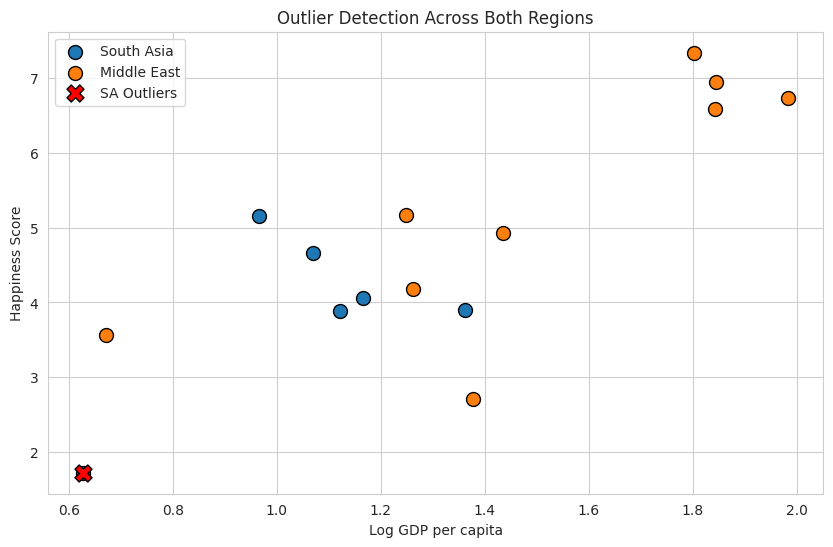

In [110]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=south_asia_df, x="Log GDP per capita", y="score", label="South Asia", s=100, edgecolor='black', linewidth=1)
sns.scatterplot(data=middle_east_df, x="Log GDP per capita", y="score", label="Middle East", s=100, edgecolor='black', linewidth=1)

sns.scatterplot(data=sa_outliers, x="Log GDP per capita", y="score",
                color="red", marker="X", s=150, label="SA Outliers", edgecolor='black', linewidth=1)

sns.scatterplot(data=me_outliers, x="Log GDP per capita", y="score",
                color="pink", marker="X", s=150, label="ME Outliers", edgecolor='black', linewidth=1)

plt.title("Outlier Detection Across Both Regions")
plt.xlabel("Log GDP per capita")
plt.ylabel("Happiness Score")
plt.grid(True)
plt.show()

**Implications of Outliers:**
- **South Asia (Red X):** Afghanistan is a clear outlier on the lower end for both GDP and Happiness Score. This extreme deviation pulls down the regional average significantly.
- **Middle East (Pink X):** There are outliers with high GDP but moderate happiness scores, or vice versa. These outliers suggest that in the Middle East, economic wealth (GDP) does not always guarantee the highest levels of happiness, possibly due to other social or political factors affecting the region.
- **Impact:** These outliers increase the variance within their respective regions, making the mean a less reliable measure of "typical" happiness without considering the spread of the data.

### 7. Visualization

• Create **boxplots** to compare the distribution of **Score** between **South Asia** and the **Middle East**.


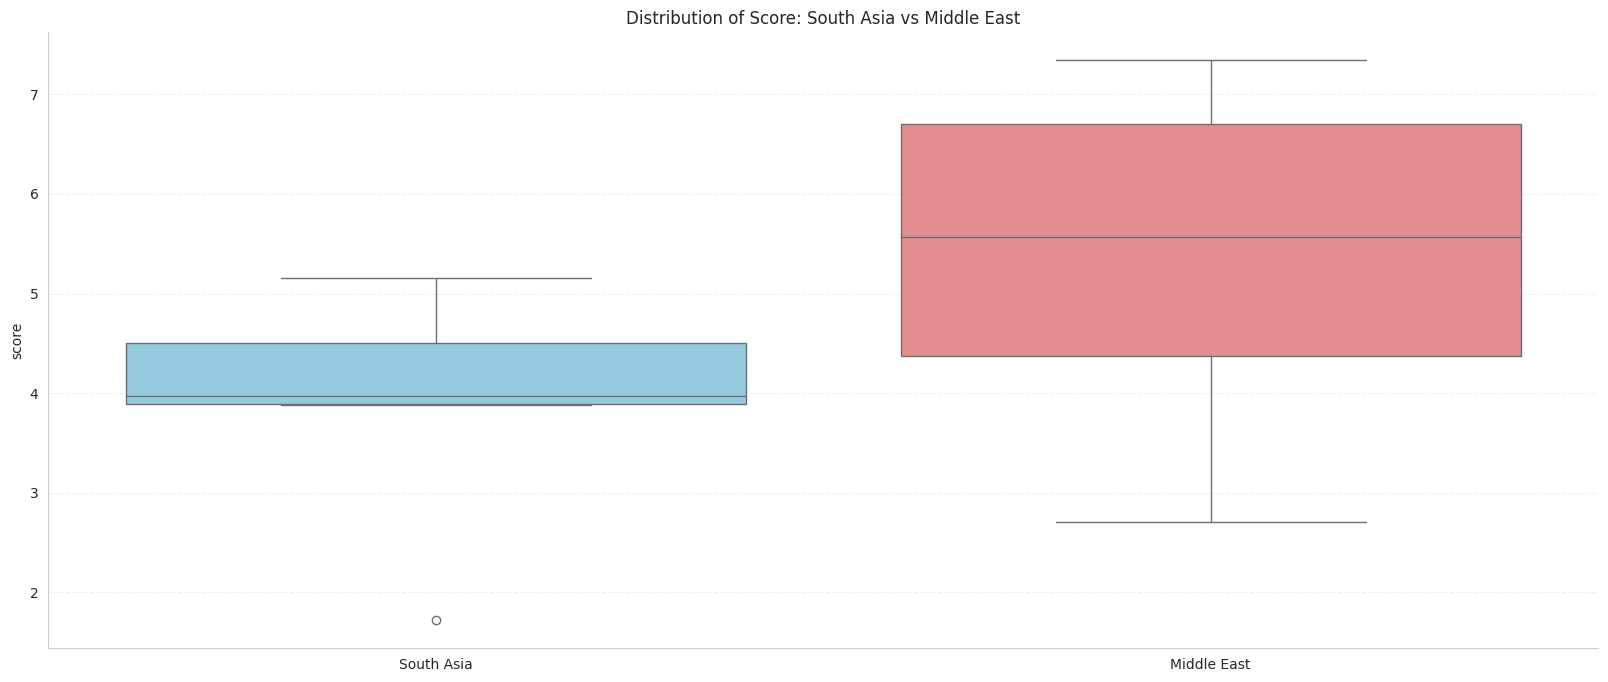

In [111]:
df_sac_copy = south_asia_df.copy()
df_mec_copy = middle_east_df.copy()
df_sac_copy["Region"] = "South Asia"
df_mec_copy["Region"] = "Middle East"
combined_df = pd.concat([df_sac_copy, df_mec_copy])

plt.figure(figsize=(20, 8))
sns.boxplot(
data=combined_df, x="Region", y="score", hue="Region", palette=["skyblue", "lightcoral"]
).set_title("Distribution of Score: South Asia vs Middle East")
plt.xlabel("")
plt.grid(axis="y", linestyle="--", alpha=0.3)
sns.despine()
plt.show()

• **Interpret the key differences in distribution shapes, medians, and outliers**

**South Asia countries:**
1. Wider ranges in scores.  
2. Lower medians with some low-end outliers.  

**Middle East countries:**
1. Higher medians and scores are more closely clustered.  
2. Larger IQR and higher variability.
